# Principal Component Analysis

In this section of the tutorial, we will investigate the use of SVM classifiers in `sklearn`. As for all models in the `sklearn` framework, Support Vector Machines mainly rely on `fit(X, y)` and `predict(X)` methods. Once fitted, components are stored in decreasing importance order in the `components_` attribute and the amount of variance they explain can be found in `explained_variance_`.

More information about the use of Principal Component Analysis in `sklearn` can be found at: <http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>.

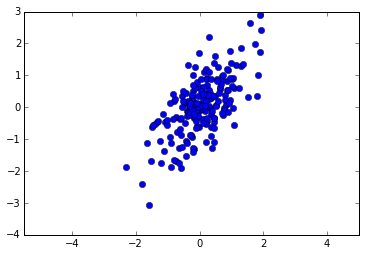

In [1]:
%matplotlib inline

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

First, we will fit a PCA keeping all components (_ie._ 2 here):

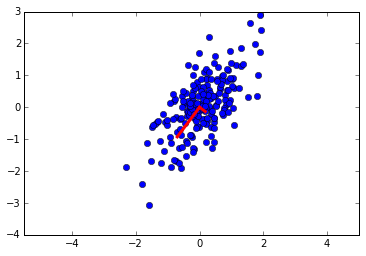

In [2]:
pca = PCA(n_components=2)
pca.fit(X)

plt.plot(X[:, 0], X[:, 1], 'o')
for i in range(pca.n_components_):
    vector = pca.explained_variance_[i] * pca.components_[i]
    plt.plot([0, vector[0]], [0, vector[1]], "r", lw=3)
plt.axis('equal');

Let us have a look at the fraction of the variance explained by each component of the PCA:

In [3]:
print(pca.explained_variance_ / np.sum(pca.explained_variance_))

[ 0.8395455  0.1604545]


Another option is to set a minimum fraction of the variance to be retained inside the model:

In [4]:
pca = PCA(0.80)
pca.fit(X)
print(pca.n_components_)

1


Finally, if we project our data on the only component retained in the model, we get:

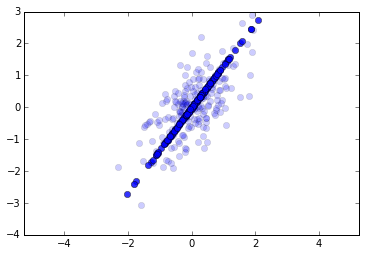

In [5]:
X_pca = pca.fit_transform(X)
X_reduced = pca.inverse_transform(X_pca)

plt.plot(X[:, 0], X[:, 1], 'o', alpha=.2)
plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'ob', alpha=.8)
plt.axis('equal');